# Twitter Sentiment Analysis
<img src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAW6_QDiOtgV9a9YsgPkLF9kk1BTTfJUQnOQ&usqp=CAU'>

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('twitt30k.csv')
df.head()

,twitts,sentiment
0,@robbiebronniman Sounds like a great night.,1
1,Damn the person who stolde my wallet !!!!! Ma...,1
2,Greetings from the piano bench (photo) http:/...,1
3,@drewryanscott i love it!! i love you!! haha f...,1
4,"@kissthestars Pretty pretty pretty please, pak...",0


In [3]:
df.shape

(30000, 2)

In [4]:
df_copy = df.copy()

In [5]:
df_copy['word counts'] = df_copy['twitts'].apply(lambda x : len(x.split()))
df_copy.head()

,twitts,sentiment,word counts
0,@robbiebronniman Sounds like a great night.,1,6
1,Damn the person who stolde my wallet !!!!! Ma...,1,18
2,Greetings from the piano bench (photo) http:/...,1,7
3,@drewryanscott i love it!! i love you!! haha f...,1,25
4,"@kissthestars Pretty pretty pretty please, pak...",0,18


# Character counts

In [6]:
def char_counts(x):
    x = x.split()
    x = ''.join(x)
    return len(x)

In [7]:
df_copy['char counts'] = df_copy['twitts'].apply(lambda x : char_counts(x))
df_copy.head()

,twitts,sentiment,word counts,char counts
0,@robbiebronniman Sounds like a great night.,1,6,38
1,Damn the person who stolde my wallet !!!!! Ma...,1,18,73
2,Greetings from the piano bench (photo) http:/...,1,7,57
3,@drewryanscott i love it!! i love you!! haha f...,1,25,110
4,"@kissthestars Pretty pretty pretty please, pak...",0,18,113


# Average word length

In [8]:
df_copy['average_word_len'] = df_copy['char counts']/df_copy['word counts']
df_copy.head()

,twitts,sentiment,word counts,char counts,average_word_len
0,@robbiebronniman Sounds like a great night.,1,6,38,6.333333
1,Damn the person who stolde my wallet !!!!! Ma...,1,18,73,4.055556
2,Greetings from the piano bench (photo) http:/...,1,7,57,8.142857
3,@drewryanscott i love it!! i love you!! haha f...,1,25,110,4.400000
4,"@kissthestars Pretty pretty pretty please, pak...",0,18,113,6.277778


# Stop word counts

In [9]:
from nltk.corpus import stopwords

In [10]:
stop_words = stopwords.words('english')

In [11]:
df['twitts'] = df['twitts'].apply(lambda x : ' '.join([t for t in x.split() if t not in stop_words]))

In [12]:
df.head()

,twitts,sentiment
0,@robbiebronniman Sounds like great night.,1
1,Damn person stolde wallet !!!!! May karma come...,1
2,Greetings piano bench (photo) http://twitpic.c...,1
3,@drewryanscott love it!! love you!! haha forge...,1
4,"@kissthestars Pretty pretty pretty please, pak...",0


# Count # and @

In [13]:
def remove(x):
    x = x.split()
    for i in range(len(x)):
        if(x[i].startswith('@')):
            x[i] = x[i].replace('@','')
        elif(x[i].startswith('#')):
            x[i].replace('#','')
    return ' '.join(x)

In [14]:
remove('@robbiebronniman Sounds like great night')

'robbiebronniman Sounds like great night'

In [15]:
df['twitts'] = df['twitts'].apply(lambda x : remove(x))

In [16]:
df.head()

,twitts,sentiment
0,robbiebronniman Sounds like great night.,1
1,Damn person stolde wallet !!!!! May karma come...,1
2,Greetings piano bench (photo) http://twitpic.c...,1
3,drewryanscott love it!! love you!! haha forget...,1
4,"kissthestars Pretty pretty pretty please, paki...",0


## If numeric digits are present in twitts

In [17]:
df_copy.head()

,twitts,sentiment,word counts,char counts,average_word_len
0,@robbiebronniman Sounds like a great night.,1,6,38,6.333333
1,Damn the person who stolde my wallet !!!!! Ma...,1,18,73,4.055556
2,Greetings from the piano bench (photo) http:/...,1,7,57,8.142857
3,@drewryanscott i love it!! i love you!! haha f...,1,25,110,4.400000
4,"@kissthestars Pretty pretty pretty please, pak...",0,18,113,6.277778


In [18]:
df_copy['numeric_counts'] = df_copy['twitts'].apply(lambda x : len([t for t in x.split() if t.isdigit()]))

In [19]:
df_copy[df_copy['numeric_counts']==5]

,twitts,sentiment,word counts,char counts,average_word_len,numeric_counts
9281,OMG my battery is empty ..... !!! aaaaah and i...,0,20,74,3.700000,5
12969,I'm so excited to go home.. 13 hours going to...,1,27,99,3.666667,5
29770,"7 children 1 baby, 82 women, 126 men on the fl...",0,17,62,3.647059,5


In [20]:
df_copy.iloc[12969]

twitts              I'm so excited to go home..  13 hours going to...
sentiment                                                           1
word counts                                                        27
char counts                                                        99
average_word_len                                             3.666667
numeric_counts                                                      5
Name: 12969, dtype: object

In [21]:
def remove_digit(x):
    x = x.split()
    for t in range(0,len(x)):
        if(x[t].isdigit()):
            x[t] = ''
    return ' '.join(x)
    

In [22]:
df['twitts'] = df['twitts'].apply(lambda x : remove_digit(x))

# Lower case conversion

In [23]:
df['twitts'] = df['twitts'].apply(lambda x : str(x).lower())

In [24]:
df.iloc[12969]

twitts       i'm excited go home..  hours going hk,  hours ...
sentiment                                                    1
Name: 12969, dtype: object

# Contraction to Expansion

In [25]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring',
"won't":"would not",
'dis':'this',
"bak":"back",
"brng":'bring',
"i'v" : 'i have'
}

In [26]:
def expand(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x

In [27]:
df['twitts'] = df['twitts'].apply(lambda x : expand(x))

# Email removals and count

In [28]:
import re

In [29]:
# re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',x)

In [30]:
df_copy['emails'] = df_copy['twitts'].apply(lambda x : re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',x))

In [31]:
df_copy['email_count'] = df_copy['emails'].apply(lambda x : len(x))

In [32]:
df_copy[df_copy['email_count']==1]

,twitts,sentiment,word counts,char counts,average_word_len,numeric_counts,emails,email_count
9757,just seeing all my@ambercamp...about to answer...,0,13,77,5.923077,0,[my@ambercamp...about],1
14619,@maritorres Cool! Just send an email to contac...,1,18,112,6.222222,0,[contactus@bondno9.com],1
19972,@hot2definc phone was stolen bro.... campbell...,0,6,60,10.000000,0,[campbell.relations@gmail.com],1
24514,@joystiq May I have a code please I'v been wan...,0,20,92,4.600000,0,[solarboy300@yahoo.com],1
24686,Looking to speak to a Met Life agent. Please c...,1,20,102,5.100000,0,[lunasin@live.com],1
28377,Aw just got the cutest background this little ...,1,18,106,5.888889,0,[popstar.team@yahoo.com],1


In [33]:
df['twitts'] = df['twitts'].apply(lambda x : re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ",x))

# Removal of special characters

In [34]:
df['twitts'] = df['twitts'].apply(lambda x : re.sub(r'[^\w]+'," ",x))

# Remove URLs

In [35]:
df['twitts'] = df['twitts'].apply(lambda x : re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'," ",x))

In [36]:
df.head()

,twitts,sentiment
0,robbiebronniman sounds like great night,1
1,damn person stolde wallet may karma come back ...,1
2,greetings piano bench photo http twitpic com 6...,1
3,drewryanscott love it love you haha forget hug...,1
4,kissthestars pretty pretty pretty please pakid...,0


In [37]:
df['twitts'] = df['twitts'].apply(lambda x : ' '.join(x.split()))

# Removal of HTML tags

In [38]:
from bs4 import BeautifulSoup

In [39]:
df['twitts'] = df['twitts'].apply(lambda x : BeautifulSoup(x,'lxml').get_text().strip())

# Removal of Accented Characters

In [40]:
import unicodedata

In [41]:
def remove_accented(x):
    x = unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [42]:
df.tail()

,twitts,sentiment
29995,calumfan1 way related photoshop,0
29996,swiz_nz really wow thats crap,0
29997,at lexus hs250h press event again cannot tell ...,0
29998,karmicunderpath ooooh there is nice thought,1
29999,mariap91 i would usually ask sun school now si...,1


In [43]:
df['twitts'] = df['twitts'].apply(lambda x : remove_accented(x))

# Conversion into base form of words

In [44]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()

In [45]:
def convert_base(x):
    words = word_tokenize(x)
    l = []
    for w in words:
        base = stemmer.stem(w)
        l.append(base)
    return ' '.join(l)
    

In [46]:
df['twitts'] = df['twitts'].apply(lambda x : convert_base(x))

# Common Occurring words Removal

In [47]:
text = ' '.join(df['twitts'])
len(text)

1501590

In [48]:
text = text.split()

In [49]:
freq_comm = pd.Series(text).value_counts()

In [50]:
fre = freq_comm[:20]

In [51]:
df['twitts'] = df['twitts'].apply(lambda x : ' '.join([w for w in x.split() if w not in fre]))

In [52]:
df.sample(5)

,twitts,sentiment
3302,both writer twitter now willowrain thisjessica...,1
9058,blacksocialit well darl,1
1678,silvergrrl pleas also keep jackthacat thought ...,0
14350,tomchil yeah im feel agoni morn googl earth mi...,0
26418,anoth aeroplan anoth sunni wan na home,0


# Rare occuring words removal

In [53]:
rare20 = freq_comm.tail(100)

In [54]:
df['twitts'] = df['twitts'].apply(lambda x : ' '.join([w for w in x.split() if w not in rare20]))

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
neg_twitts = df[df["sentiment"]==0]

In [57]:
neg_text = ' '.join(neg_twitts['twitts'])

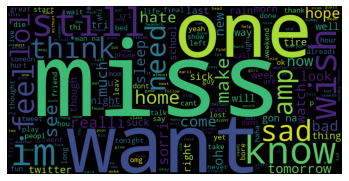

In [59]:
wc = WordCloud(width = 800,height = 400).generate(neg_text)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [60]:
pos_twitts = df[df['sentiment']==1]

In [62]:
pos_text = " ".join(pos_twitts['twitts'])

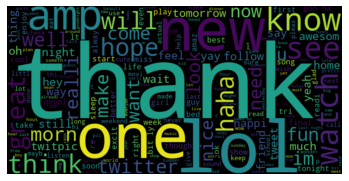

In [64]:
pos_wc = WordCloud(width = 800, height = 400).generate(pos_text)
plt.imshow(pos_wc,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [88]:
df['sentiment'].value_counts()

1    15000
0    15000
Name: sentiment, dtype: int64

# Training algorithm for sentiment analysis

In [273]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [274]:
X = df['twitts']
y = df['sentiment']

In [275]:
tfidf = TfidfVectorizer(norm = 'l1')

In [276]:
X = tfidf.fit_transform(X)

In [277]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

In [278]:
X_train

<24000x35201 sparse matrix of type '<class 'numpy.float64'>'
	with 177315 stored elements in Compressed Sparse Row format>

In [279]:
model_svm = LinearSVC()
model_svm.fit(X_train,y_train)

LinearSVC()

In [280]:
y_pred = model_svm.predict(X_test)

In [281]:
acc_score = accuracy_score(y_test,y_pred)
print(acc_score)

0.7426666666666667


In [282]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      3000
           1       0.72      0.79      0.75      3000

    accuracy                           0.74      6000
   macro avg       0.75      0.74      0.74      6000
weighted avg       0.75      0.74      0.74      6000



In [283]:
print(confusion_matrix(y_test,y_pred))

[[2079  921]
 [ 623 2377]]


In [284]:
x = ['i am really happy. that you came with me']

In [285]:
model_svm.predict(tfidf.transform(x))[0]

1

#### Hyperparameter tuning

In [286]:
params = {
    'penalty' : ['l1','l2'],
    'loss' : ['higne','squared_hinge'],
    'dual' : ['auto',True,False],
    'tol' : [0.1,0.01,0.001],
    'C' : [1.0,2.0]
}

In [287]:
gs = GridSearchCV(estimator = LinearSVC(), param_grid=params)

In [288]:
gs.fit(X,y)

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [1.0, 2.0], 'dual': ['auto', True, False],
                         'loss': ['higne', 'squared_hinge'],
                         'penalty': ['l1', 'l2'], 'tol': [0.1, 0.01, 0.001]})

In [289]:
gs.best_params_

{'C': 1.0, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l1', 'tol': 0.1}

In [290]:
model_svm_h = LinearSVC(penalty='l1',C = 1.0, dual=False, loss = 'squared_hinge', tol=0.1)

In [291]:
model_svm_h.fit(X_train,y_train)

LinearSVC(dual=False, penalty='l1', tol=0.1)

In [292]:
y_pred_n = model_svm_h.predict(X_test)

In [293]:
print(accuracy_score(y_test,y_pred_n))

0.7435


In [294]:
print(classification_report(y_test,y_pred_n))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73      3000
           1       0.72      0.80      0.76      3000

    accuracy                           0.74      6000
   macro avg       0.75      0.74      0.74      6000
weighted avg       0.75      0.74      0.74      6000



In [295]:
print(confusion_matrix(y_test,y_pred))

[[2079  921]
 [ 623 2377]]


In [296]:
x = ['i am really happy. that you came with me']

In [297]:
model_svm.predict(tfidf.transform(x))[0]

1

In [300]:
def run_svm(df):
    X = df['twitts']
    y = df['sentiment']
    tfidf = TfidfVectorizer(norm = 'l1',ngram_range = (1,5),analyzer = 'word', max_features = 5000)
    X = tfidf.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
    print('shape of X ',X.shape)
    
    clf = LinearSVC(penalty='l1',C = 1.0, dual=False, loss = 'squared_hinge', tol=0.1)
    clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    
    print('Accuracy Score ', accuracy_score(y_test,y_pred))
    print('Classification report ',classification_report(y_test,y_pred))
    
    return tfidf,clf
tfidf,clf = run_svm(df)

shape of X  (30000, 5000)
Accuracy Score  0.7433333333333333
Classification report                precision    recall  f1-score   support

           0       0.76      0.70      0.73      3000
           1       0.73      0.78      0.75      3000

    accuracy                           0.74      6000
   macro avg       0.74      0.74      0.74      6000
weighted avg       0.74      0.74      0.74      6000



In [301]:
clf.predict(tfidf.transform(x))

array([1], dtype=int64)

In [302]:
import pickle

In [303]:
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))

In [254]:
clf = pickle.load(open('clf.pkl','rb'))
tfidf = pickle.load(open('tfidf.pkl','rb'))

In [255]:
x = ['i am really happy. that you came with me']
x = tfidf1.transform(x)

In [257]:
clf.predict(x)

array([1], dtype=int64)

# Logistic Regression

In [258]:
from sklearn.linear_model import LogisticRegression

In [259]:
lr = LogisticRegression()

In [304]:
def run_lr(df):
    X = df['twitts']
    y = df['sentiment']
    tfidf = TfidfVectorizer(norm = 'l1',ngram_range = (1,5),analyzer = 'word', max_features = 5000)
    X = tfidf.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
    print('shape of X ',X.shape)
    
    clf = LogisticRegression()
    clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    
    print('Accuracy Score ', accuracy_score(y_test,y_pred))
    print('Classification report ',classification_report(y_test,y_pred))
    
    return tfidf,clf
tfidf_lr,clf_lr = run_lr(df)

shape of X  (30000, 5000)
Accuracy Score  0.7438333333333333
Classification report                precision    recall  f1-score   support

           0       0.76      0.71      0.73      3000
           1       0.73      0.78      0.75      3000

    accuracy                           0.74      6000
   macro avg       0.75      0.74      0.74      6000
weighted avg       0.75      0.74      0.74      6000



In [305]:
clf_lr.predict(tfidf.transform(x))

array([1], dtype=int64)

# Decision Tree 

In [307]:
from sklearn.tree import DecisionTreeClassifier
def run_decision_tree(df):
    X = df['twitts']
    y = df['sentiment']
    tfidf = TfidfVectorizer(norm = 'l1',ngram_range = (1,5),analyzer = 'word', max_features = 5000)
    X = tfidf.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
    print('shape of X ',X.shape)
    
    clf = DecisionTreeClassifier(criterion='entropy')
    clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    
    print('Accuracy Score ', accuracy_score(y_test,y_pred))
    print('Classification report ',classification_report(y_test,y_pred))
    
    return tfidf,clf
tfidf_dt,clf_dt = run_lr(df)

shape of X  (30000, 5000)
Accuracy Score  0.7438333333333333
Classification report                precision    recall  f1-score   support

           0       0.76      0.71      0.73      3000
           1       0.73      0.78      0.75      3000

    accuracy                           0.74      6000
   macro avg       0.75      0.74      0.74      6000
weighted avg       0.75      0.74      0.74      6000



In [308]:
clf_lr.predict(tfidf.transform(x))

array([1], dtype=int64)